# Datasets and Data inspection 

Inspect APOKASC tables and data, required you to reduce the data first

In [1]:
import h5py
import numpy as np
import pylab as plt
from astropy.io import fits
from astroNN.apogee import allstar
from py import apokasc2_h5_path
from astroNN.shared.matplotlib import pylab_style

pylab_style(paper=True)

allstar_f = fits.getdata(allstar(dr=17))

h5f_apokasc2 = h5py.File(apokasc2_h5_path, "r")

print("APOKASC-2 size: ", len(h5f_apokasc2["KIC"]))

APOKASC-2 size:  6355


## Spatial distribution

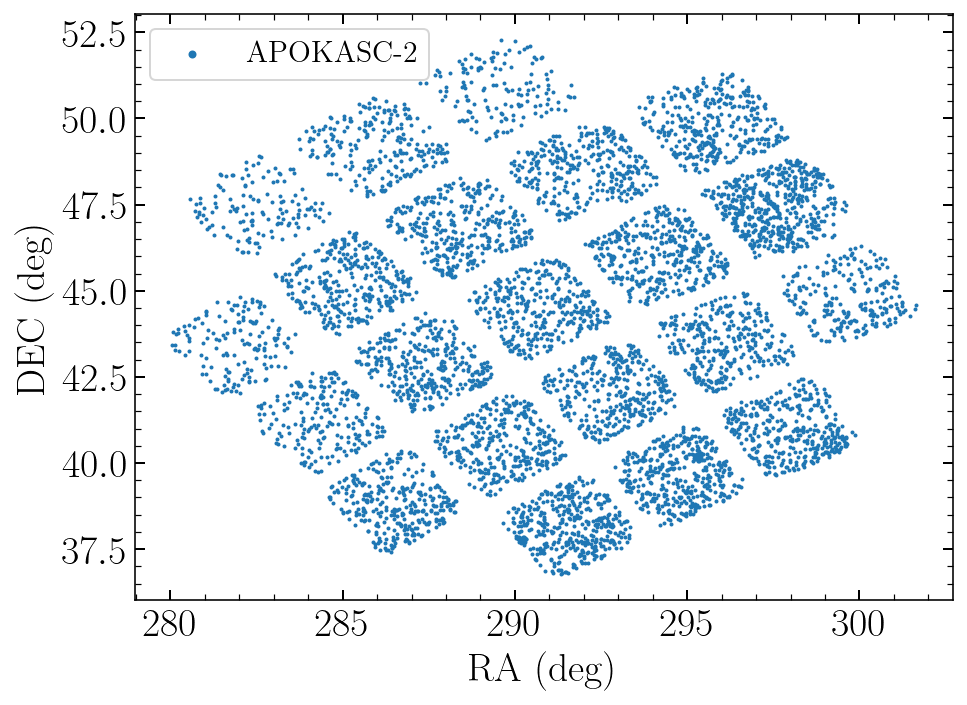

In [3]:
fig, ax = plt.subplots(1, 1)

ax.scatter(
    allstar_f["RA"][h5f_apokasc2["allstar_dr17_idx"]],
    allstar_f["DEC"][h5f_apokasc2["allstar_dr17_idx"]],
    s=1,
    label="APOKASC-2",
)
ax.set_xlabel("RA (deg)")
ax.set_ylabel("DEC (deg)")
ax.legend(markerscale=3)
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()


## Inspect APOKASC-2 sample

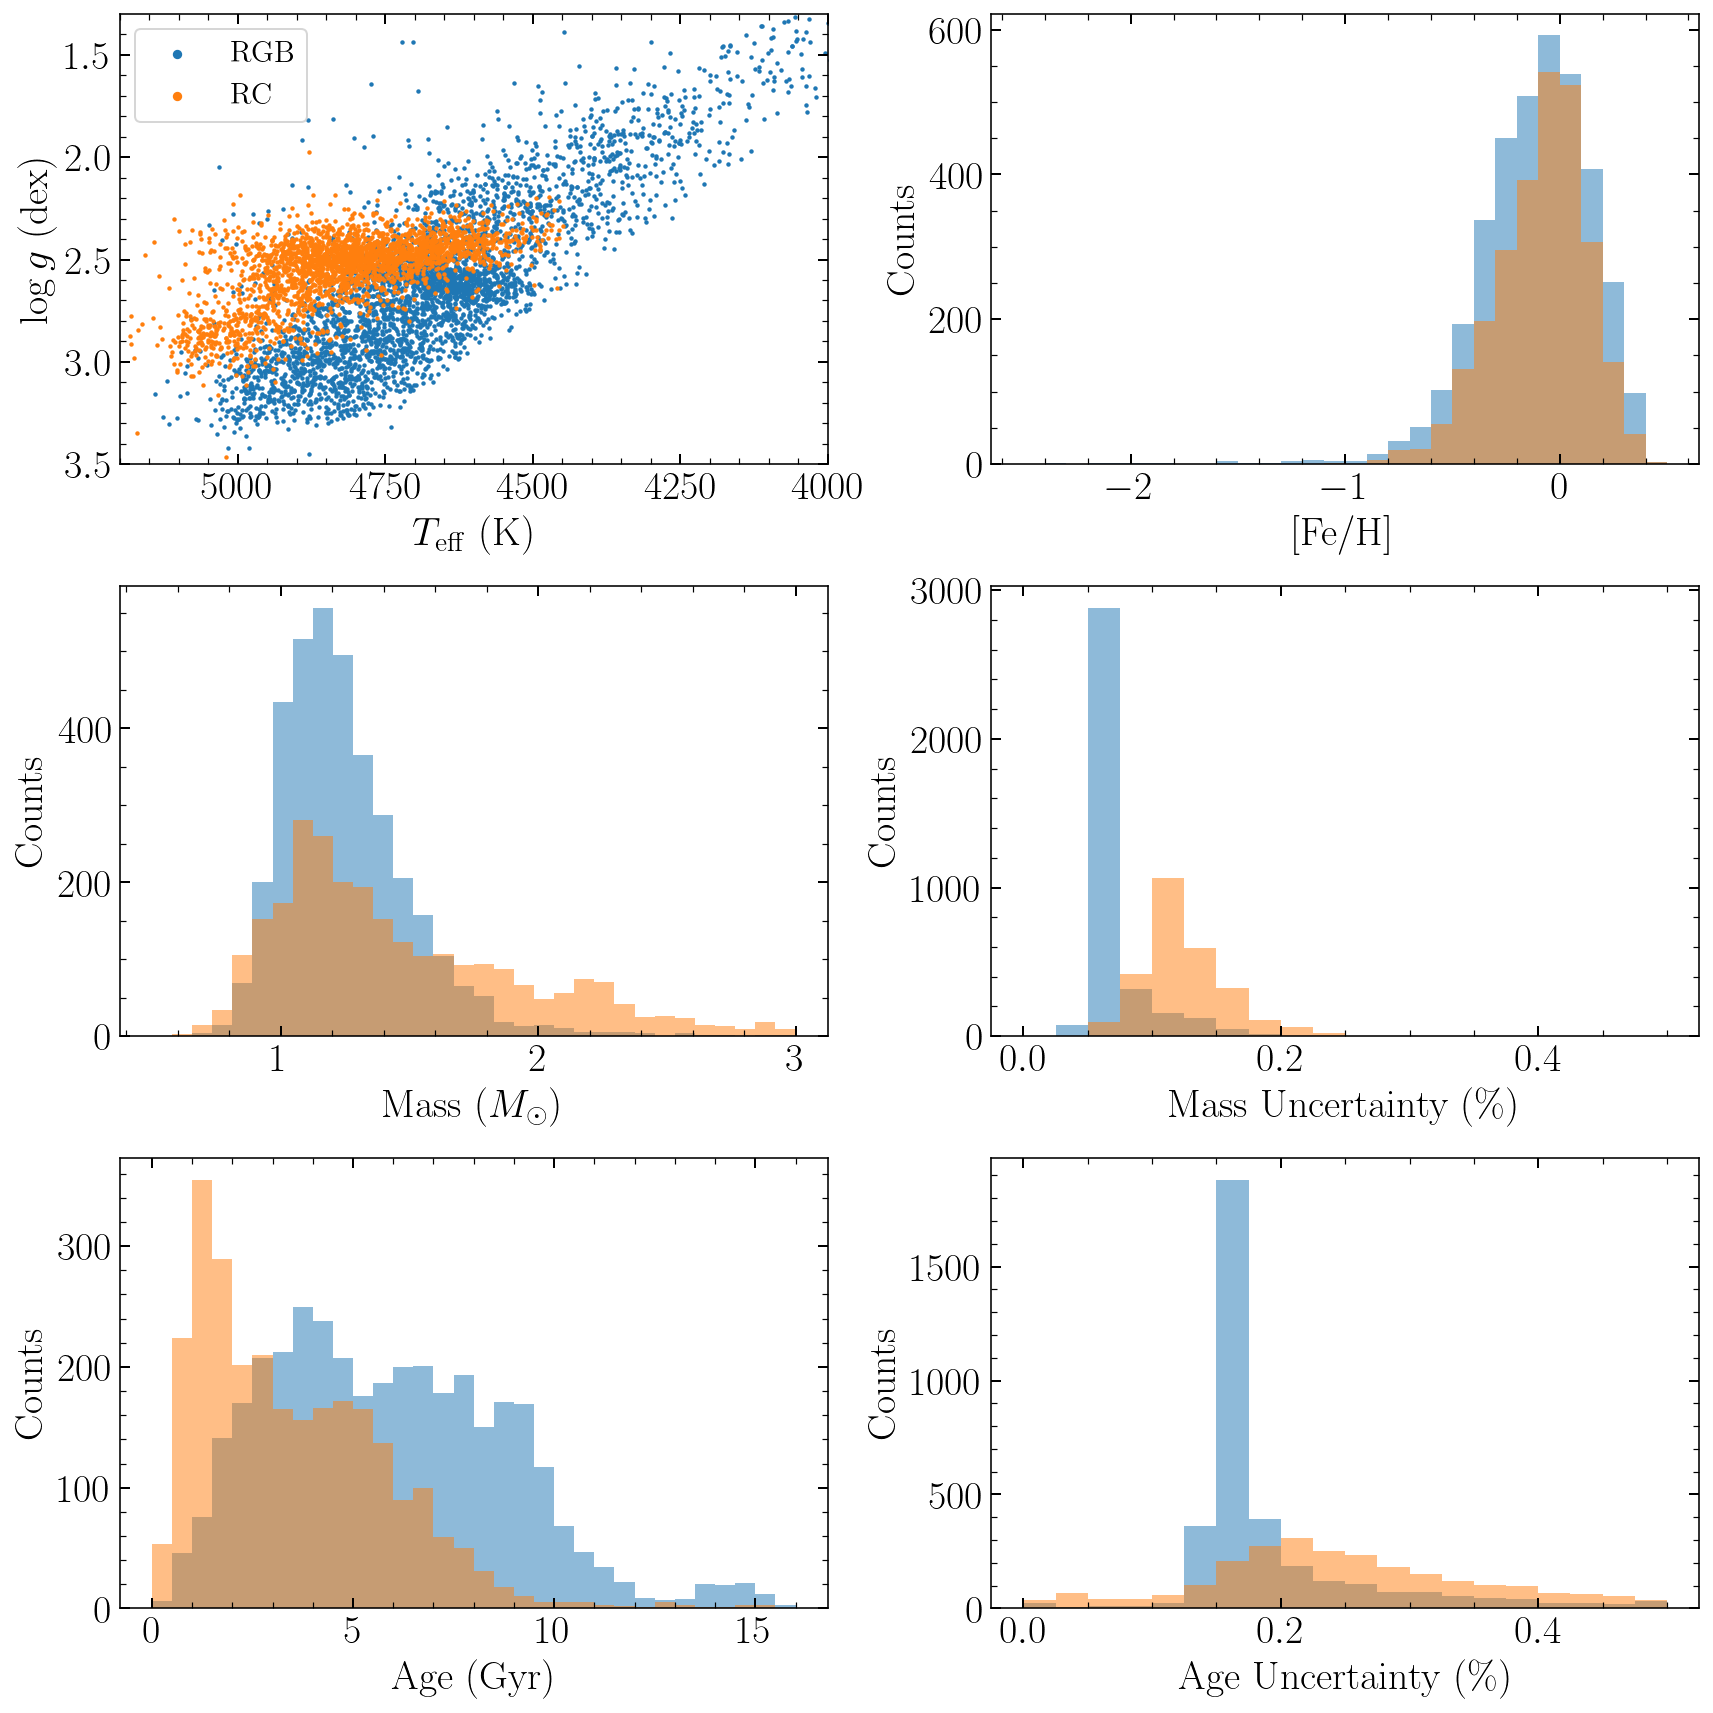

In [1]:
import h5py
import numpy as np
import pylab as plt
from astropy.table import Table
from astropy.io import fits
from astroNN.apogee import allstar
from astroNN.shared.matplotlib import pylab_style
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from py import apokasc2_h5_path
from py.utils import salaris_etal_2015

pylab_style(paper=True)

apokasc2_h5_f = h5py.File(apokasc2_h5_path, "r")
allstar_f = fits.getdata(allstar(dr=17))[apokasc2_h5_f["allstar_dr17_idx"]]

RGB_idx_2 = (apokasc2_h5_f["ES"][()] == 1)
RC_idx_2 = (apokasc2_h5_f["ES"][()] == 2)

fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12))
ax11.scatter(allstar_f["TEFF"][RGB_idx_2], allstar_f["LOGG"][RGB_idx_2], s=1.5, label="RGB")
ax11.scatter(allstar_f["TEFF"][RC_idx_2], allstar_f["LOGG"][RC_idx_2], s=1.5, label="RC")
ax11.set_xlim(5200, 4000)
ax11.set_ylim(3.5, 1.3)
ax11.set_xlabel(r"$T_\mathrm{eff}$ (K)")
ax11.set_ylabel(r"$\log{g}$ (dex)")
ax11.legend()

ax12.hist(allstar_f["FE_H"][RGB_idx_2], range=(-2.5, 0.5), bins=30, alpha=0.5)
ax12.hist(allstar_f["FE_H"][RC_idx_2], range=(-2.5, 0.5), bins=30, alpha=0.5)
ax12.set_xlabel("[Fe/H]")
ax12.set_ylabel("Counts")

ax21.hist(apokasc2_h5_f["Mass"][RGB_idx_2], range=(0.5, 3.), bins=32, alpha=0.5)
ax21.hist(apokasc2_h5_f["Mass"][RC_idx_2], range=(0.5, 3.), bins=32, alpha=0.5)
ax21.set_xlabel("Mass ($M_\odot$)")
ax21.set_ylabel("Counts")

ax22.hist(apokasc2_h5_f["Mass_err"][RGB_idx_2] / apokasc2_h5_f["Mass"][RGB_idx_2], range=(0., 0.5), bins=20, alpha=0.5)
ax22.hist(apokasc2_h5_f["Mass_err"][RC_idx_2] / apokasc2_h5_f["Mass"][RC_idx_2], range=(0., 0.5), bins=20, alpha=0.5)
ax22.set_xlabel("Mass Uncertainty ($\%$)")
ax22.set_ylabel("Counts")

ax31.hist(apokasc2_h5_f["Age"][RGB_idx_2], range=(0., 16.), bins=32, alpha=0.5)
ax31.hist(apokasc2_h5_f["Age"][RC_idx_2], range=(0., 16.), bins=32, alpha=0.5)
ax31.set_xlabel("Age (Gyr)")
ax31.set_ylabel("Counts")

ax32.hist(apokasc2_h5_f["Age_err"][RGB_idx_2] / apokasc2_h5_f["Age"][RGB_idx_2], range=(0., 0.5), bins=20, alpha=0.5)
ax32.hist(apokasc2_h5_f["Age_err"][RC_idx_2] / apokasc2_h5_f["Age"][RC_idx_2], range=(0., 0.5), bins=20, alpha=0.5)
ax32.set_xlabel("Age Uncertainty ($\%$)")
ax32.set_ylabel("Counts")
fig.tight_layout()

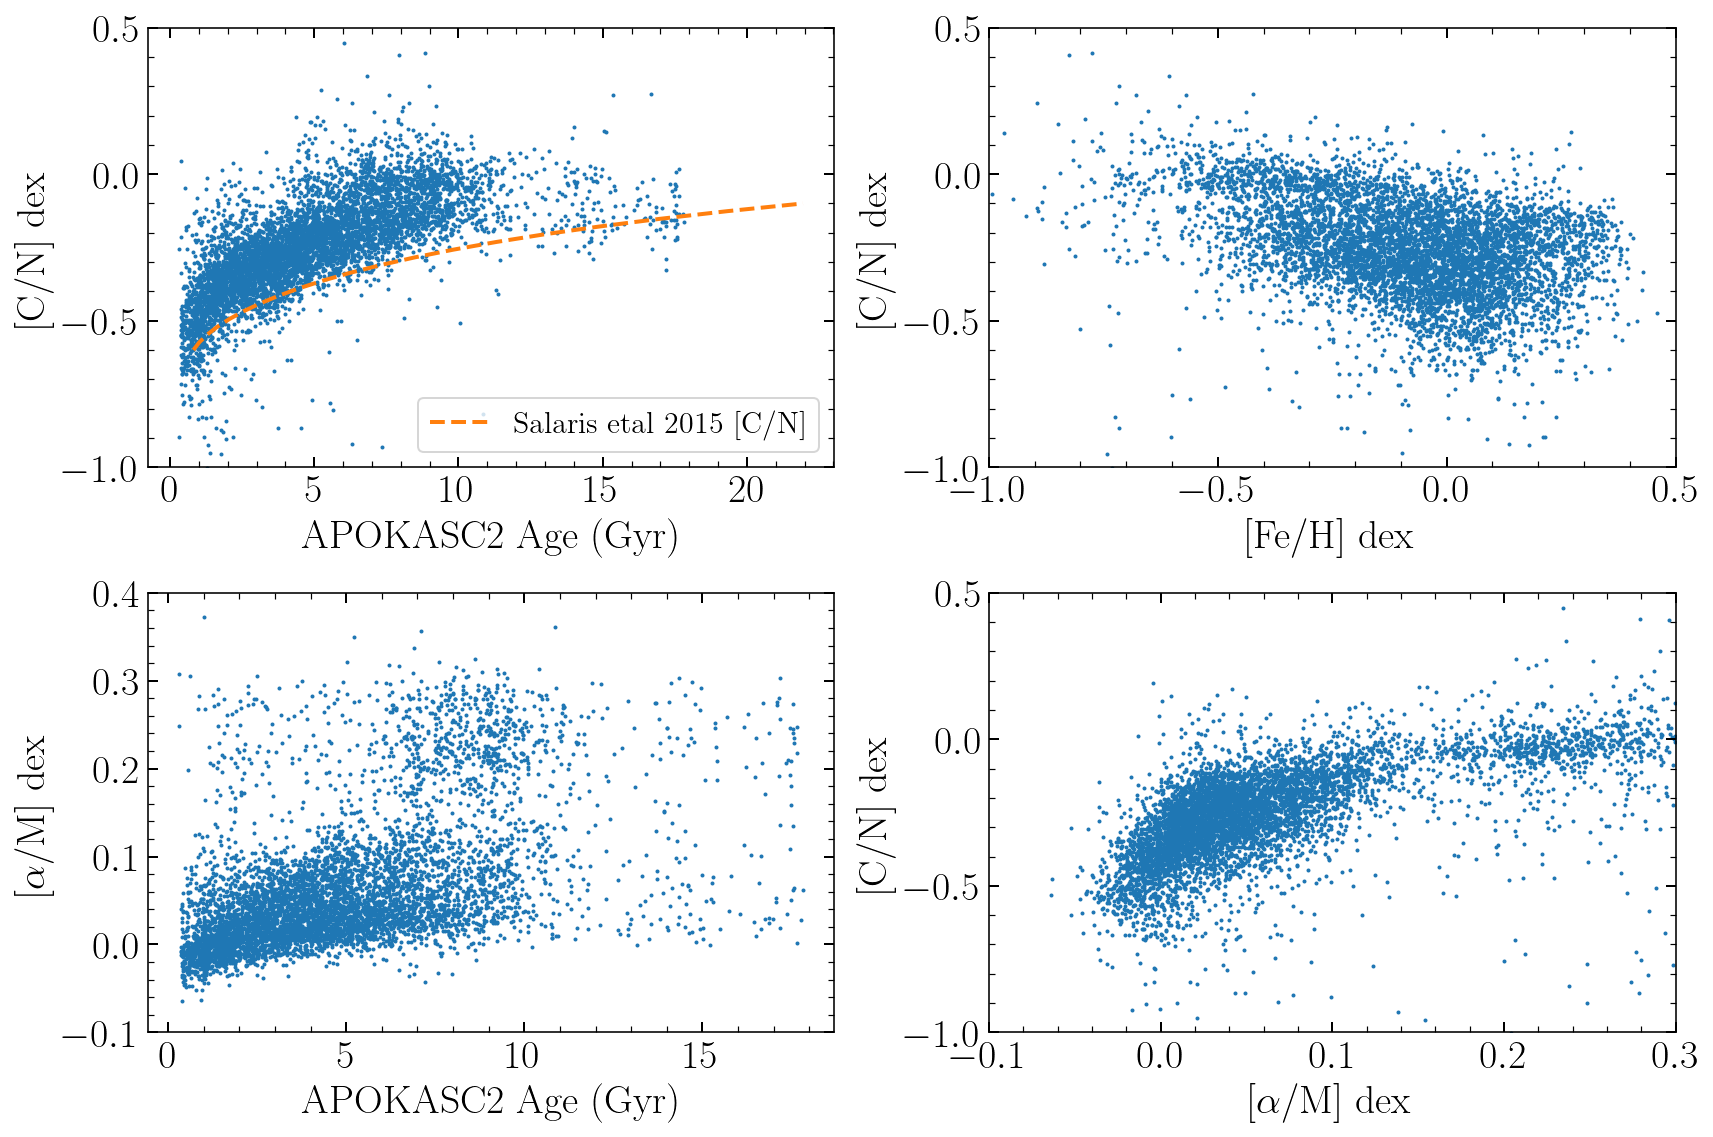

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
ax1.scatter(apokasc2_h5_f["Age"], allstar_f["X_H"][:, 0]-allstar_f["X_H"][:, 2], s=1)
ax1.plot(salaris_etal_2015(np.linspace(-0.6, -0.1, 20), 0.), np.linspace(-0.6, -0.1, 20), 
         ls="--", lw=2., c="C1", label="Salaris etal 2015 [C/N]")
ax1.set_xlabel("APOKASC2 Age (Gyr)")
ax1.set_ylabel("[C/N] dex")
ax1.set_ylim(-1., 0.5)
ax1.legend()

ax2.scatter(allstar_f["Fe_H"], allstar_f["X_H"][:, 0]-allstar_f["X_H"][:, 2], s=1)
ax2.set_xlabel("[Fe/H] dex")
ax2.set_ylabel("[C/N] dex")
ax2.set_xlim(-1., 0.5)
ax2.set_ylim(-1., 0.5)

ax3.scatter(apokasc2_h5_f["Age"], allstar_f["Alpha_M"], s=1)
ax3.set_xlabel("APOKASC2 Age (Gyr)")
ax3.set_ylabel("[$\\alpha$/M] dex")
ax3.set_ylim(-0.1, 0.4)

ax4.scatter(allstar_f["Alpha_M"], allstar_f["X_H"][:, 0]-allstar_f["X_H"][:, 2], s=1)
ax4.set_xlabel("[$\\alpha$/M] dex")
ax4.set_ylabel("[C/N] dex")
ax4.set_xlim(-0.1, 0.3)
ax4.set_ylim(-1., 0.5)

fig.tight_layout()

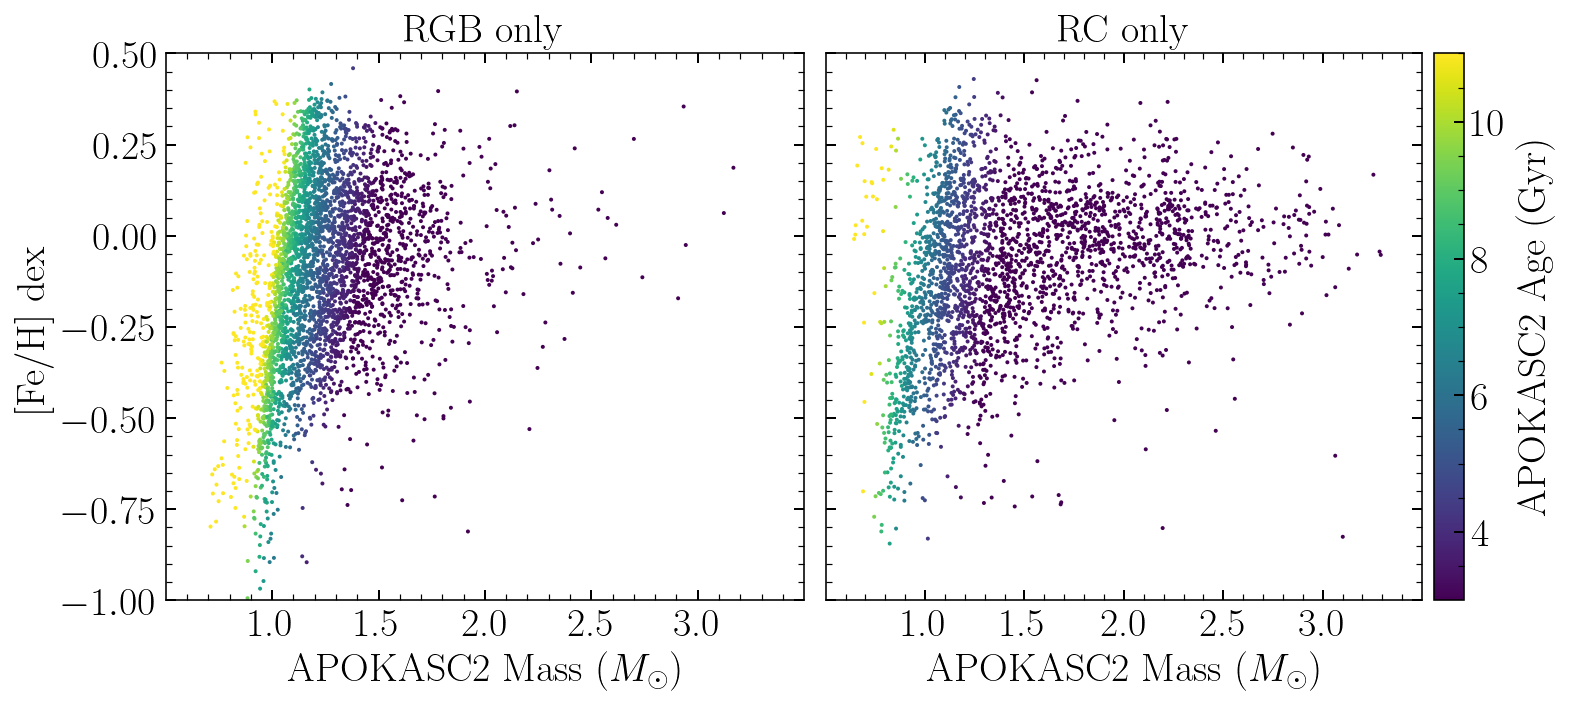

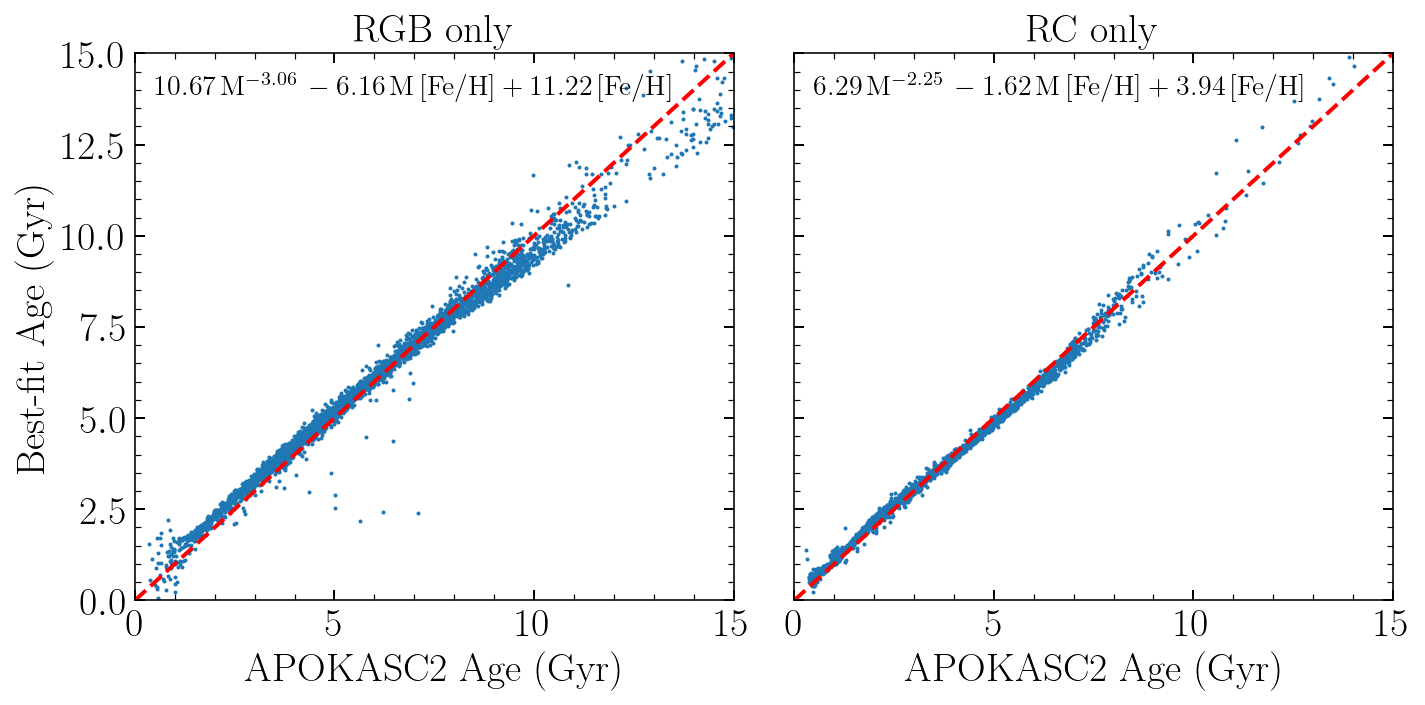

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

mappable = ax1.scatter(apokasc2_h5_f["Mass"][RGB_idx_2], allstar_f["FE_H"][RGB_idx_2], s=1, c=apokasc2_h5_f["Age"][RGB_idx_2], vmin=3, vmax=11)
ax1.set_xlabel("APOKASC2 Mass ($M_\odot$)")
ax1.set_xlim(0.5, 3.5)
ax1.set_ylim(-1., 0.5)
ax1.xaxis.set_ticks([1.0, 1.5, 2.0, 2.5, 3.0])
ax1.xaxis.set_ticklabels([1.0, 1.5, 2.0, 2.5, 3.0])
ax1.set_ylabel("[Fe/H] dex")
ax1.set_title("RGB only")

mappable = ax2.scatter(apokasc2_h5_f["Mass"][RC_idx_2], allstar_f["FE_H"][RC_idx_2], s=1, c=apokasc2_h5_f["Age"][RC_idx_2], vmin=3, vmax=11)
ax2.set_xlabel("APOKASC2 Mass ($M_\odot$)")
ax2.set_xlim(0.5, 3.5)
ax2.set_ylim(-1., 0.5)
ax2.set_yticklabels([])
ax2.xaxis.set_ticks([1.0, 1.5, 2.0, 2.5, 3.0])
ax2.xaxis.set_ticklabels([1.0, 1.5, 2.0, 2.5, 3.0])
ax2.set_title("RC only")

ax_divider = make_axes_locatable(ax2)
cax = ax_divider.append_axes("right", size="5%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("APOKASC2 Age (Gyr)")
fig.tight_layout()

def mass_feh_age(x, a, b, c, d):
    mass, feh = x
    return a * mass**b + c * mass * feh + d * feh


popt_rgb, pcov = curve_fit(
    mass_feh_age,
    (apokasc2_h5_f["Mass"][RGB_idx_2][~np.isnan(allstar_f["FE_H"][RGB_idx_2])], 
     allstar_f["FE_H"][RGB_idx_2][~np.isnan(allstar_f["FE_H"][RGB_idx_2])]),
    apokasc2_h5_f["Age"][RGB_idx_2][~np.isnan(allstar_f["FE_H"][RGB_idx_2])],
    (1.0, -2.5, 1.0, 1.0),
)
popt_rc, pcov = curve_fit(
    mass_feh_age,
    (apokasc2_h5_f["Mass"][RC_idx_2][~np.isnan(allstar_f["FE_H"][RC_idx_2])], 
     allstar_f["FE_H"][RC_idx_2][~np.isnan(allstar_f["FE_H"][RC_idx_2])]),
    apokasc2_h5_f["Age"][RC_idx_2][~np.isnan(allstar_f["FE_H"][RC_idx_2])],
    (1.0, -2.5, 1.0, 1.0),
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(
    apokasc2_h5_f["Age"][RGB_idx_2],
    mass_feh_age(
        (apokasc2_h5_f["Mass"][RGB_idx_2], allstar_f["FE_H"][RGB_idx_2]), *popt_rgb
    ),
    s=1,
)
ax1.plot([0.0, 15.0], [0.0, 15.0], ls="--", c="r", lw=2.0)
ax1.set_xlim(0, 15)
ax1.set_ylim(0, 15)
ax1.set_xlabel("APOKASC2 Age (Gyr)")
ax1.set_ylabel("Best-fit Age (Gyr)")
ax1.set_title("RGB only")
ax1.text(
    0.5,
    14.5,
    f"${popt_rgb[0]:.2f}\,\mathrm{{M}}^{{{popt_rgb[1]:.2f}}}\,{popt_rgb[2]:.2f}\,\mathrm{{M}}\,[\mathrm{{Fe/H}}] + {popt_rgb[3]:.2f}\,[\mathrm{{Fe/H}}]$ ",
    ha="left",
    va="top",
    fontsize=14,
)

ax2.scatter(
    apokasc2_h5_f["Age"][RC_idx_2],
    mass_feh_age(
        (apokasc2_h5_f["Mass"][RC_idx_2], allstar_f["FE_H"][RC_idx_2]), *popt_rc
    ),
    s=1,
)
ax2.plot([0.0, 15.0], [0.0, 15.0], ls="--", c="r", lw=2.0)
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 15)
ax2.set_yticklabels([])
ax2.set_xlabel("APOKASC2 Age (Gyr)")
ax2.set_title("RC only")
ax2.text(
    0.5,
    14.5,
    f"${popt_rc[0]:.2f}\,\mathrm{{M}}^{{{popt_rc[1]:.2f}}}\,{popt_rc[2]:.2f}\,\mathrm{{M}}\,[\mathrm{{Fe/H}}] + {popt_rc[3]:.2f}\,[\mathrm{{Fe/H}}]$ ",
    ha="left",
    va="top",
    fontsize=14,
)

fig.tight_layout()

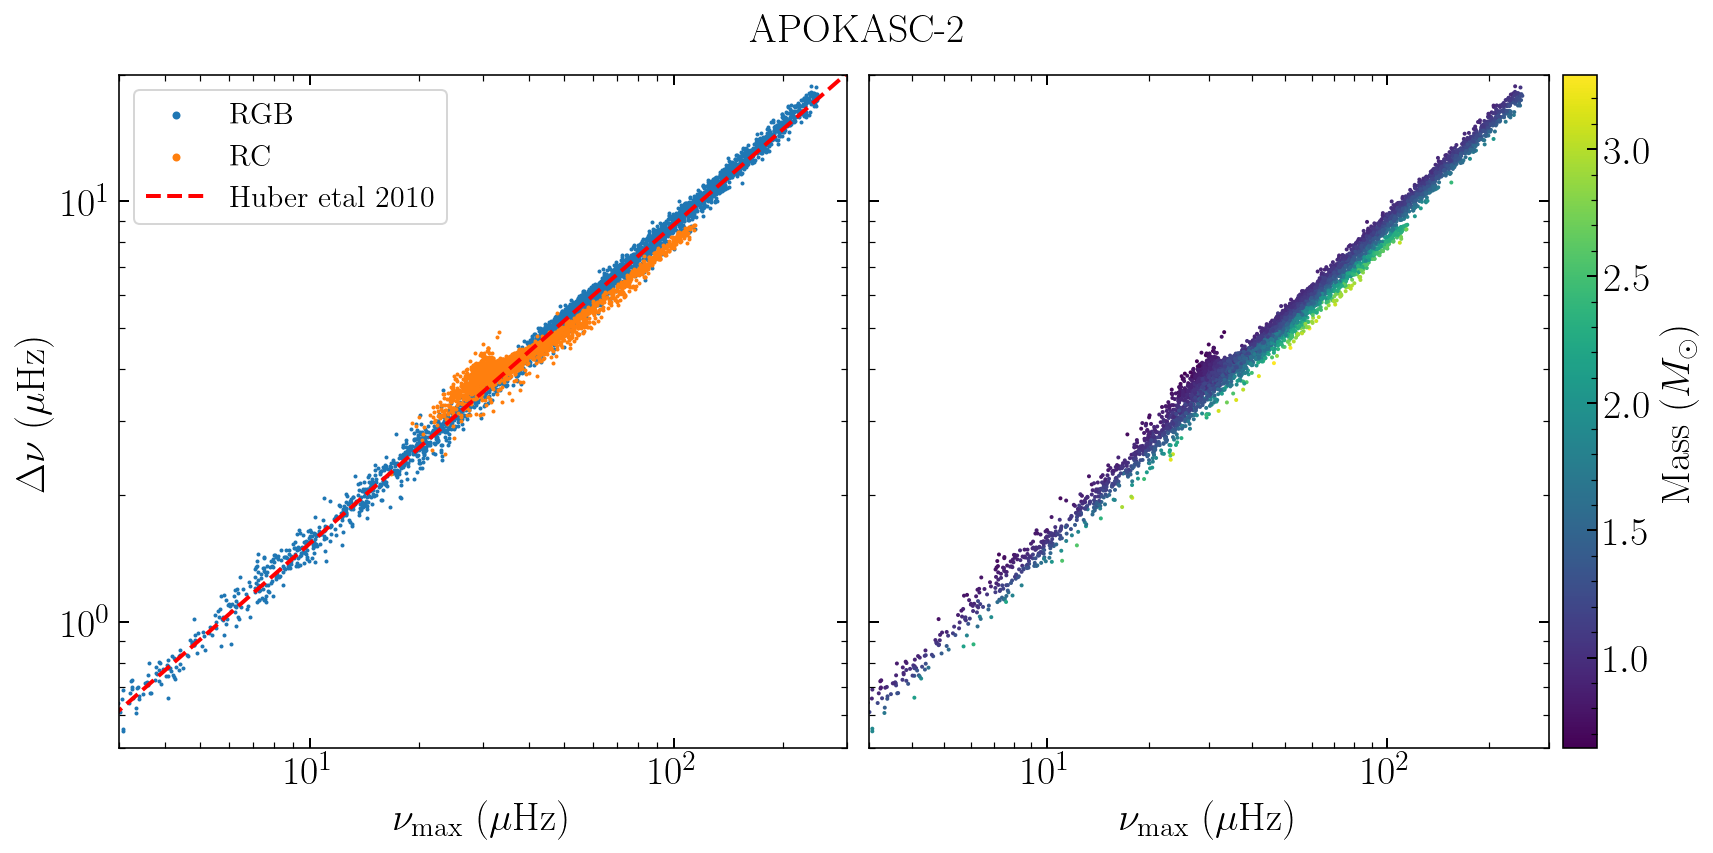

In [1]:
import h5py
import numpy as np
import pylab as plt
from astropy.table import Table
from astropy.io import fits
from astroNN.apogee import allstar
from py import apokasc2_h5_path
from py.utils import numax_to_deltanu
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from astroNN.shared.matplotlib import pylab_style

pylab_style(paper=True)

apokasc2_h5_f = h5py.File(apokasc2_h5_path, "r")
allstar_f = fits.getdata(allstar(dr=17))[apokasc2_h5_f["allstar_dr17_idx"]]

RGB_idx_2 = (apokasc2_h5_f["ES"][()] == 1)
RC_idx_2 = (apokasc2_h5_f["ES"][()] == 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(apokasc2_h5_f["Numax"][RGB_idx_2], apokasc2_h5_f["Deltanu"][RGB_idx_2], s=1, label="RGB")
ax1.scatter(apokasc2_h5_f["Numax"][RC_idx_2], apokasc2_h5_f["Deltanu"][RC_idx_2], s=1, label="RC")
numaxs = np.linspace(0.1, 400., 50)
ax1.plot(numaxs, numax_to_deltanu(numaxs), c="r", ls="--", lw=2., label="Huber etal 2010")
ax1.set_xlabel(r"$\nu_\mathrm{max}$ ($\mu$Hz)")
ax1.set_ylabel(r"$\Delta \nu$ ($\mu$Hz)")
ax1.set_xlim(3., 300.)
ax1.set_ylim(0.5, 20.)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.legend()

mappable = ax2.scatter(apokasc2_h5_f["Numax"][RGB_idx_2 | RC_idx_2], apokasc2_h5_f["Deltanu"][RGB_idx_2 | RC_idx_2], c=apokasc2_h5_f["Mass"][RGB_idx_2 | RC_idx_2], s=1)
ax2.set_xlabel(r"$\nu_\mathrm{max}$ ($\mu$Hz)")
ax2.set_xlim(3., 300.)
ax2.set_ylim(0.5, 20.)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_yticklabels([])

ax_divider = make_axes_locatable(ax2)
cax = ax_divider.append_axes("right", size="5%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("Mass ($M_\odot$)")

fig.suptitle("APOKASC-2")
fig.tight_layout()

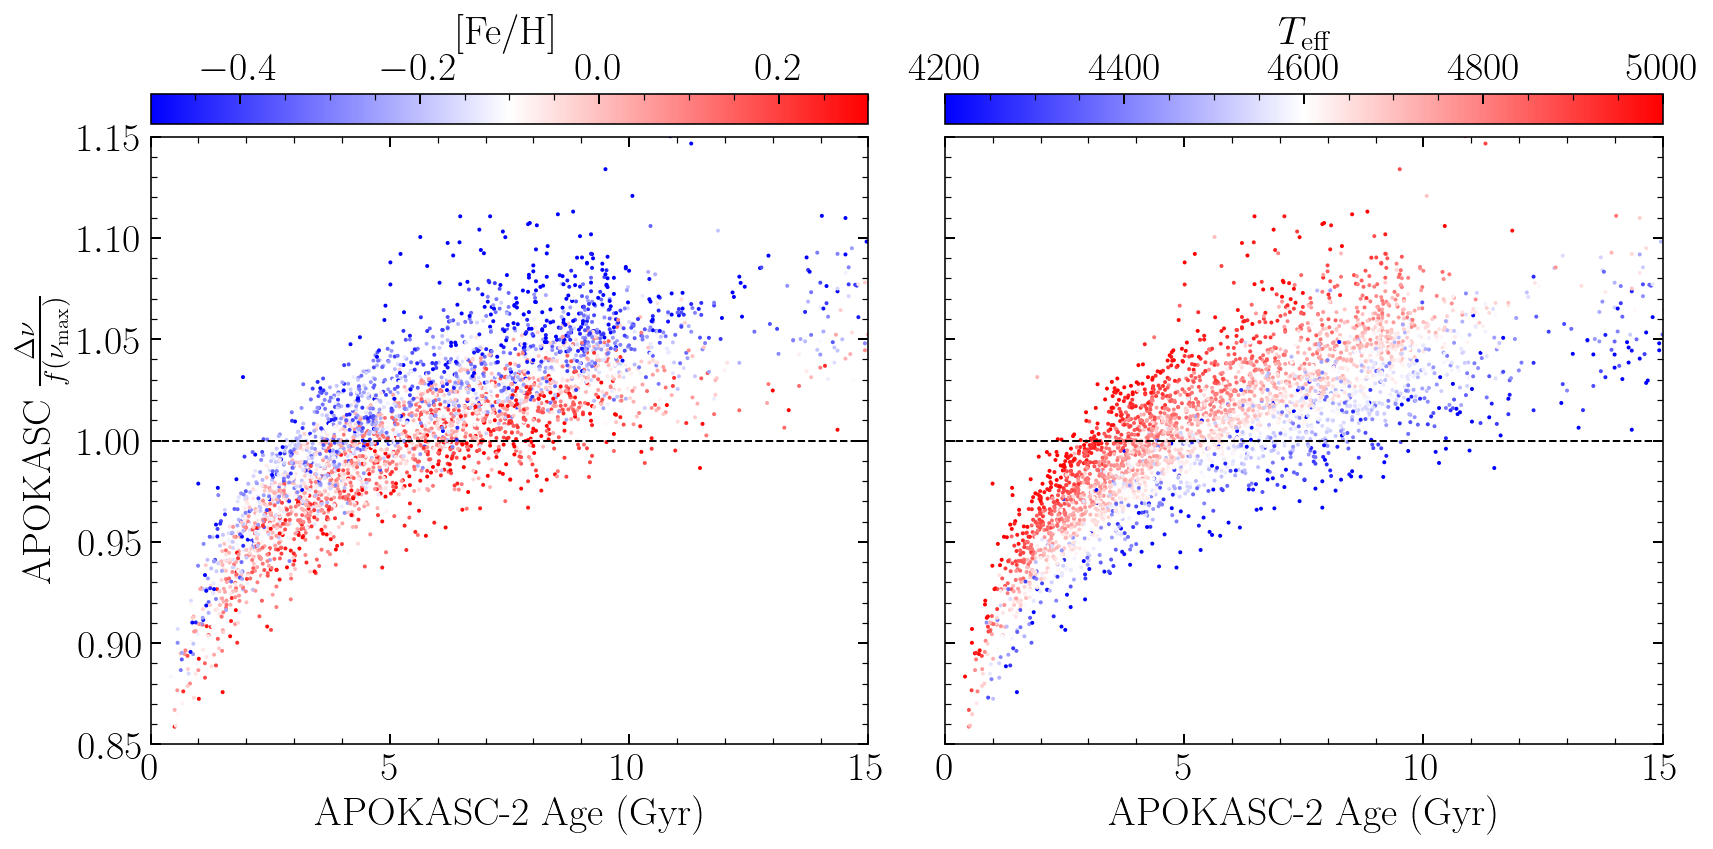

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
mappable = ax1.scatter(
    apokasc2_h5_f["Age"][RGB_idx_2],
    apokasc2_h5_f["Deltanu"][RGB_idx_2]
    / numax_to_deltanu(apokasc2_h5_f["Numax"][RGB_idx_2]),
    s=1.0,
    c=allstar_f["Fe_H"][RGB_idx_2],
    vmin=-0.5,
    vmax=0.3,
    cmap="bwr",
)
ax1.axhline(1., ls="--", c="k")
ax_divider = make_axes_locatable(ax1)
cax = ax_divider.append_axes("top", size="5%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label("[Fe/H]")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
ax1.set_xlim(0., 15.)
ax1.set_ylim(0.85, 1.15)
ax1.set_xlabel("APOKASC-2 Age (Gyr)")
ax1.set_ylabel(r"APOKASC $\frac{\Delta\nu}{f(\nu_\mathrm{max})}$")

mappable = ax2.scatter(
    apokasc2_h5_f["Age"][RGB_idx_2],
    apokasc2_h5_f["Deltanu"][RGB_idx_2]
    / numax_to_deltanu(apokasc2_h5_f["Numax"][RGB_idx_2]),
    s=1.0,
    c=allstar_f["TEFF"][RGB_idx_2],
    vmin=4200,
    vmax=5000,
    cmap="bwr",
)
ax2.axhline(1., ls="--", c="k")
ax_divider = make_axes_locatable(ax2)
cax = ax_divider.append_axes("top", size="5%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label("$T_{\mathrm{eff}}$")
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
ax2.set_xlim(0., 15.)
ax2.set_ylim(0.85, 1.15)
ax2.set_xlabel("APOKASC-2 Age (Gyr)")
ax2.yaxis.set_ticklabels([])

fig.tight_layout()

## Actual Encoder-Decoder Training Sample

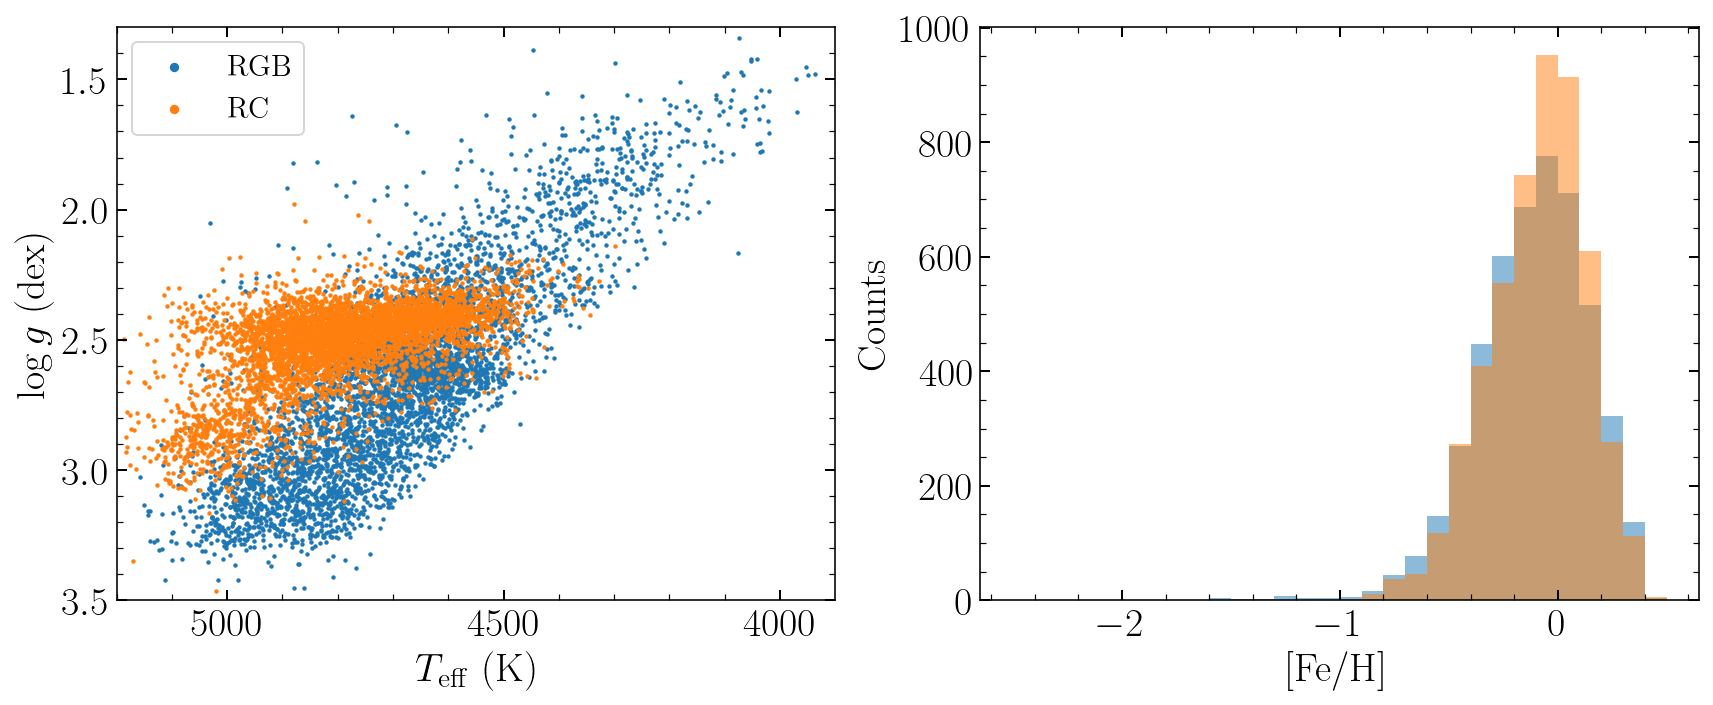

In [8]:
import numpy as np
import pylab as plt
from tqdm import tqdm
from astroNN.apogee import allstar
from astroNN.shared import pylab_style
from astropy.io import fits
from py.dataset_utils import APOKASC


pylab_style(paper=True)

apokasc_f = APOKASC()

RGB_idx_2 = (apokasc_f.dataset["Evostate"][()] == 1)
RC_idx_2 = (apokasc_f.dataset["Evostate"][()] == 2)

fig, ((ax11, ax12)) = plt.subplots(1, 2, figsize=(12, 5))
ax11.scatter(apokasc_f.allstar["TEFF"][RGB_idx_2], apokasc_f.allstar["LOGG"][RGB_idx_2], s=1.5, label="RGB")
ax11.scatter(apokasc_f.allstar["TEFF"][RC_idx_2], apokasc_f.allstar["LOGG"][RC_idx_2], s=1.5, label="RC")
ax11.set_xlim(5200, 3900)
ax11.set_ylim(3.5, 1.3)
ax11.set_xlabel(r"$T_\mathrm{eff}$ (K)")
ax11.set_ylabel(r"$\log{g}$ (dex)")
ax11.legend()

ax12.hist(apokasc_f.allstar["FE_H"][RGB_idx_2], range=(-2.5, 0.5), bins=30, alpha=0.5)
ax12.hist(apokasc_f.allstar["FE_H"][RC_idx_2], range=(-2.5, 0.5), bins=30, alpha=0.5)
ax12.set_xlabel("[Fe/H]")
ax12.set_ylabel("Counts")

fig.tight_layout()

## Miglio et al 2021 Age

Text(0, 0.5, 'Miglio etal 2021 Age (Gyr)')

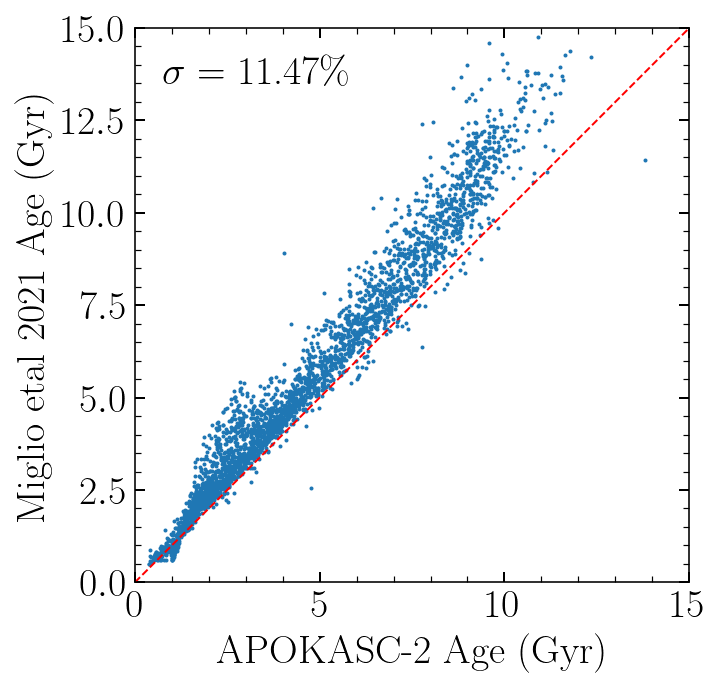

In [1]:
import h5py
import numpy as np
import pylab as plt
from astropy.io import ascii
from astropy.stats import mad_std
from py import apokasc2_h5_path, miglio2021_path
from astroNN.shared.matplotlib import pylab_style

pylab_style(paper=True)

andrea = ascii.read(miglio2021_path)
h5f_apokasc2 = h5py.File(apokasc2_h5_path, "r")

xy, x_ind, y_ind = np.intersect1d(
    andrea["KIC"], h5f_apokasc2["KIC"], return_indices=True
)

age_andrea = andrea["age"][x_ind]
age_apokasc2 = h5f_apokasc2["Age"][y_ind]

fig, ax = plt.subplots(1, 1)
ax.scatter(age_apokasc2, age_andrea, s=1.)
ax.plot([0., 15.], [0., 15.], c="r", ls="--")
ax.set_aspect("equal")
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.text(
    0.05,
    0.95,
    f"$\sigma=$ {mad_std((age_andrea - age_apokasc2) / age_apokasc2)*100:.2f}\%",
    ha="left",
    va="top",
    fontsize=20,
    transform=ax.transAxes,
)
ax.set_xlabel("APOKASC-2 Age (Gyr)")
ax.set_ylabel("Miglio etal 2021 Age (Gyr)")

In [13]:
andrea

APOGEE_ID,KIC,RA,DEC,FE_H,A_FE,age,age_68L,age_68U,mass,mass_68L,mass_68U,dist,dist_68L,dist_68U,Av,Av_68L,Av_68U,evstate
str18,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
2M19222920+3710285,1569842,290.62167,37.1746,-0.29065,0.15982,10.76079,8.71355,13.13258,0.95844,0.90668,1.01776,613.68652,606.38672,621.09375,0.00662,-0.05112,0.06579,1
2M19300513+3717470,1726291,292.52139,37.29641,-0.38827,0.25072,11.77025,9.58706,14.40098,0.93905,0.88765,0.9941,1150.94727,1136.21094,1165.76172,0.34508,0.28245,0.40787,1
2M19060736+3740100,2284679,286.5307,37.66945,-0.49474,0.27253,12.10431,9.97929,14.6714,0.90659,0.859,0.95692,582.73926,576.24023,589.375,0.02931,-0.02598,0.08447,1
2M19280882+3736381,2305590,292.03679,37.6106,-0.40002,0.25282,10.78651,8.6719,12.93126,0.96082,0.91333,1.02099,1066.32812,1055.05859,1078.27148,0.30342,0.25579,0.35477,1
2M19250117+3742537,2442483,291.2549,37.71492,-0.23169,0.17134,11.77681,9.61709,14.30218,0.95338,0.90243,1.01062,1628.69141,1607.36328,1649.86328,0.31255,0.25188,0.37649,1
2M19261694+3745527,2443903,291.5706,37.76465,-0.64612,0.26771,11.55185,9.40329,14.20222,0.90078,0.84996,0.95495,1098.50586,1085.58594,1111.66992,0.20186,0.14501,0.25858,1
2M19202341+3749231,2568912,290.09755,37.82309,-0.15917,0.20958,12.21603,9.91736,14.91368,0.96063,0.90767,1.01912,1219.7168,1203.94531,1235.97656,0.32504,0.26133,0.38898,1
2M19271735+3755229,2714785,291.82233,37.92304,-0.21398,0.21341,12.22591,9.9225,14.86996,0.95105,0.89965,1.00893,1045.99609,1032.83203,1059.26758,0.15174,0.09131,0.21451,1
2M19025956+3802049,2831815,285.74821,38.03472,-0.28269,0.2171,12.07058,9.63899,14.53846,0.9466,0.89756,1.00608,1816.91406,1794.58984,1840.23438,0.26251,0.20756,0.3225,1


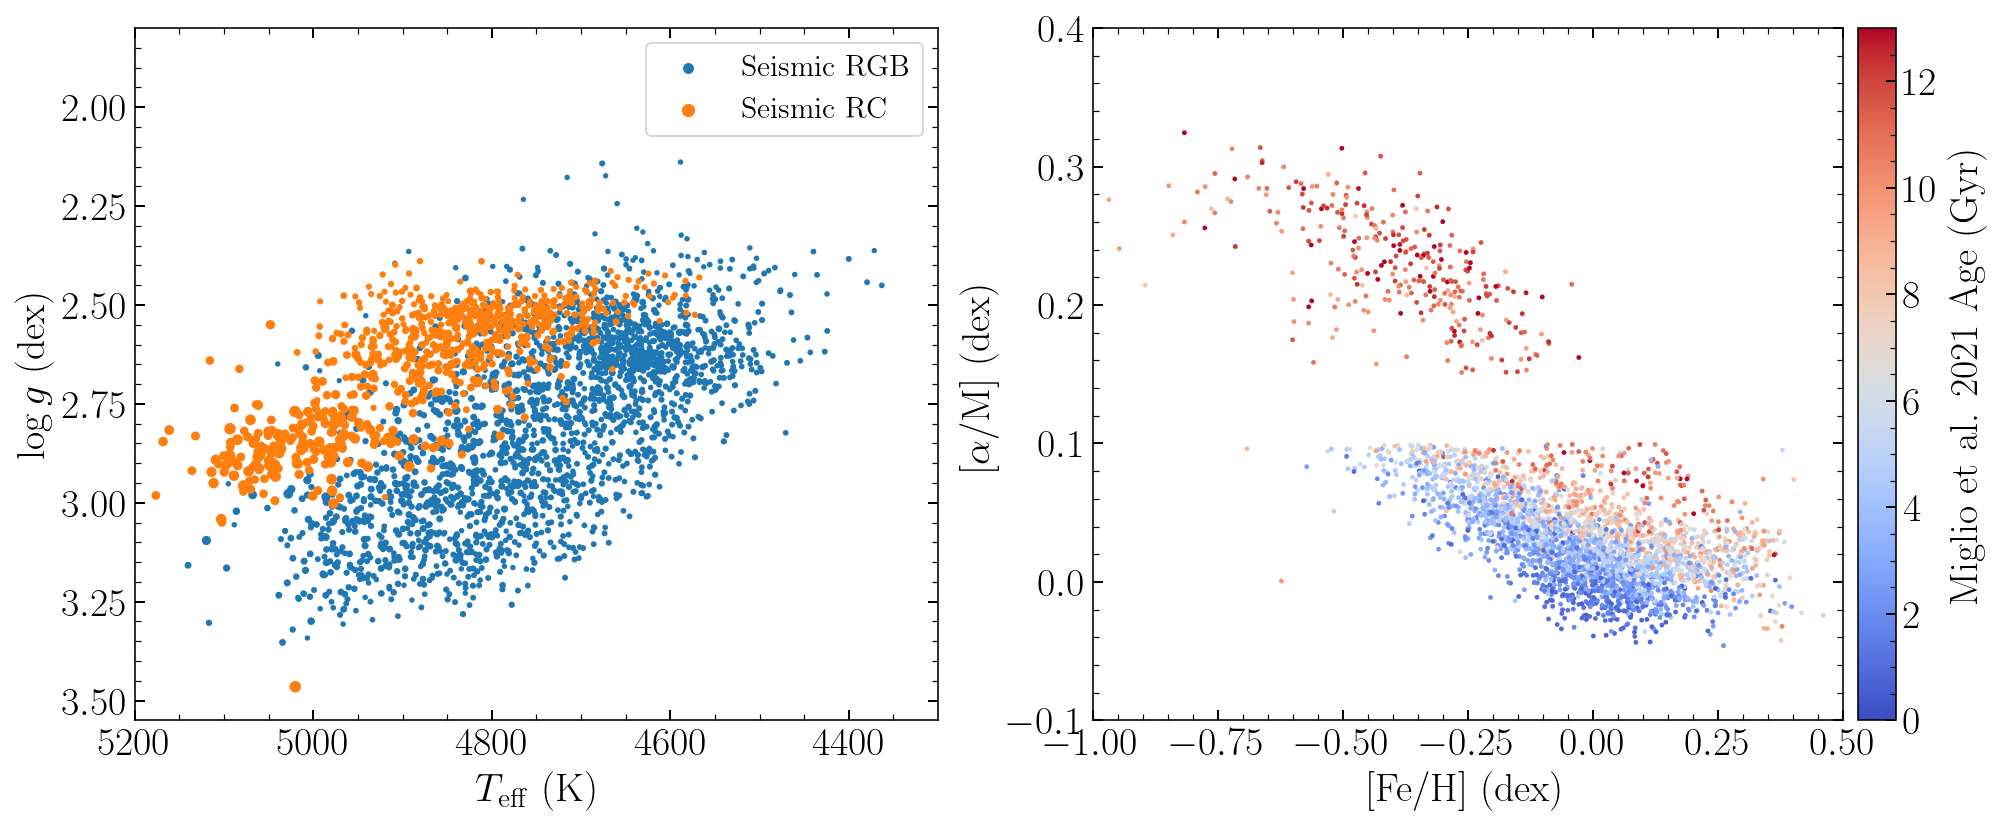

In [5]:
import h5py
import numpy as np
import pylab as plt

from astropy.io import fits, ascii
from astroNN.apogee import allstar
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from py import apokasc2_h5_path, miglio2021_path
from astroNN.shared.matplotlib import pylab_style


pylab_style(paper=True)

andrea = ascii.read(miglio2021_path)
h5f_apokasc2 = h5py.File(apokasc2_h5_path, "r")

allstar_f = fits.getdata(allstar(dr=17))
_, idx1, idx2 = np.intersect1d(
    allstar_f["APOGEE_ID"], andrea["APOGEE_ID"], return_indices=True
)

miglio_dr17 = andrea[idx2]
allstar_f = allstar_f[idx1]


rgb_idx = miglio_dr17["evstate"] == 1
rc_idx = miglio_dr17["evstate"] == 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.83))
ax1.scatter(
    allstar_f["TEFF"][rgb_idx],
    allstar_f["LOGG"][rgb_idx],
    s=np.exp(miglio_dr17["mass"][rgb_idx] * 1.2),
    rasterized=True,
    label="Seismic RGB",
)
ax1.scatter(
    allstar_f["TEFF"][rc_idx],
    allstar_f["LOGG"][rc_idx],
    s=np.exp(miglio_dr17["mass"][rc_idx] * 1.2),
    rasterized=True,
    label="Seismic RC",
)
ax1.set_xlim(5200, 4300)
ax1.set_ylim(3.55, 1.8)
ax1.set_xlabel("$T_\mathrm{eff}$ (K)")
ax1.set_ylabel("$\log{g}$ (dex)")
ax1.legend(markerscale=1.5, loc="best")

mappable = ax2.scatter(
    allstar_f["FE_H"],
    allstar_f["ALPHA_M"],
    c=miglio_dr17["age"],
    s=2,
    vmin=0,
    vmax=13,
    cmap="coolwarm",
    rasterized=True,
)
ax2.set_xlim(-1.0, 0.5)
ax2.set_ylim(-0.1, 0.4)
ax2.set_xlabel("[Fe/H] (dex)")
ax2.set_ylabel("[$\\alpha$/M] (dex)")
ax_divider = make_axes_locatable(ax2)
cax = ax_divider.append_axes("right", size="5%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("Miglio et al. 2021 Age (Gyr)")
fig.tight_layout()
fig.savefig("figs/miglio_etal.pdf")


Text(0, 0.5, '[$\\alpha$/M]')

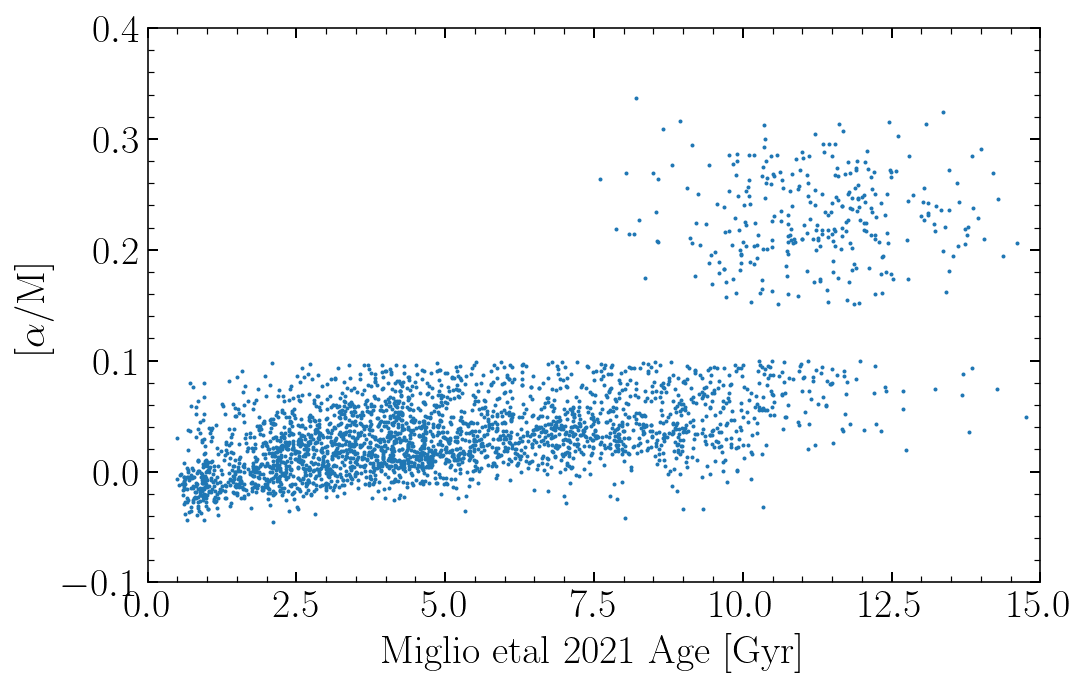

In [6]:
fig, ax = plt.subplots(1, 1)
ax.scatter(miglio_dr17["age"], allstar_f["ALPHA_M"], s=1)
ax.set_xlim(0, 15)
ax.set_ylim(-0.1, 0.4)
ax.set_xlabel("Miglio etal 2021 Age [Gyr]")
ax.set_ylabel("[$\\alpha$/M]")